### the value of 'k' indicates the number of training samples that are needed to classify the test sample.

In [15]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [16]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
df['target']= iris.target

In [20]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [21]:
# you can also create FLower_name column using map function
#df['flower_name'] =df.target.map({0:'setosa',1:'versicolor',2:'virginica'})


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
df0=df[df['target']==0]
df1=df[df['target']==1]
df2=df[df['target']==2]

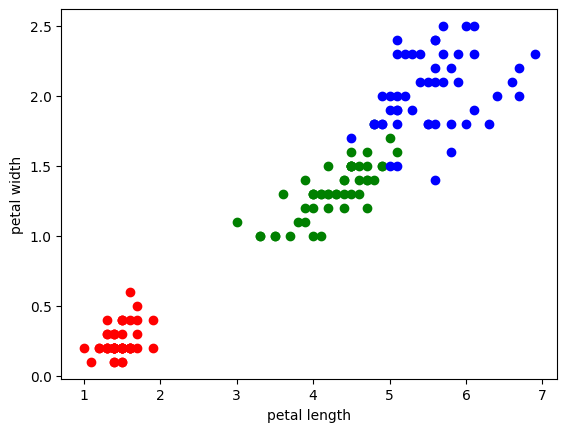

In [29]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color= "red")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color= "green")
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color= "blue")

In [32]:
x=df.drop(['target','flower_name'],axis=1)
y=df.target

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
len(x_train)

120

In [38]:
len(x_test)

30

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)

In [40]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
model.score(x_test,y_test)

1.0

In [44]:
model=KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [45]:
model.score(x_test,y_test)

0.9666666666666667

confusion matrix

In [49]:
y_pred=model.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 12]])

Text(50.722222222222214, 0.5, 'truth')

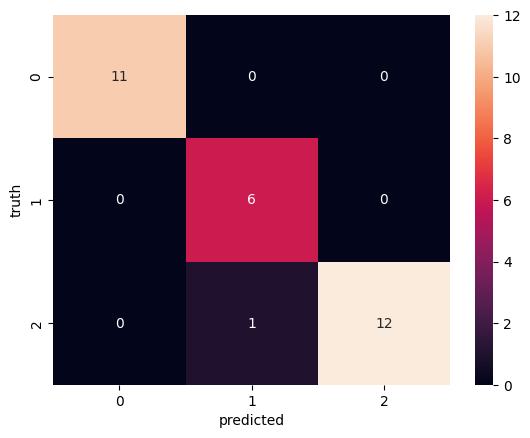

In [52]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

**find out the optimal k value.**

Text(0, 0.5, 'Error Rate')

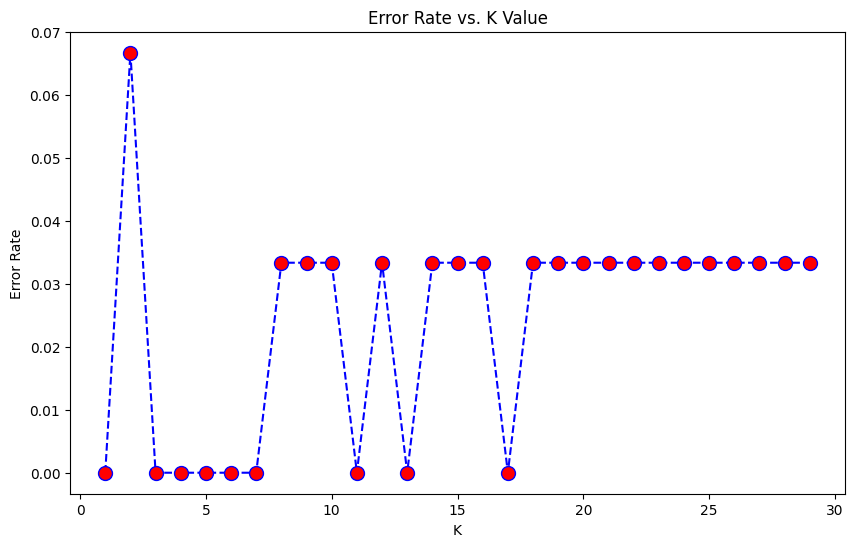

In [58]:

error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
#print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

**DIGITS Dataset**

In [59]:
from sklearn.datasets import load_digits
digits=load_digits()

In [60]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [62]:
len(x_test)

360

In [63]:
model=KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [64]:
model.score(x_test,y_test)

0.9861111111111112

confusion metrix

In [65]:
y_pred=model.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 34]])

Text(50.722222222222214, 0.5, 'truth')

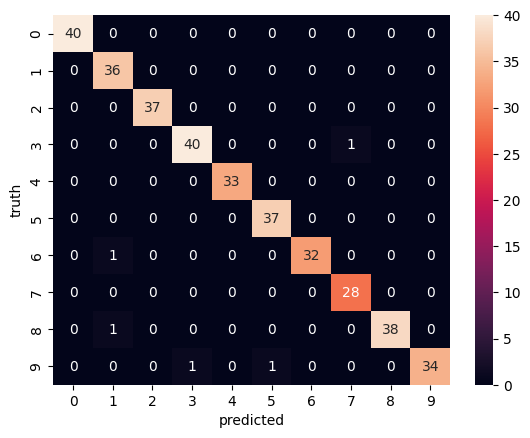

In [70]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

# Finding k value

**Method 1: optimal value of 'K' = sqrt(N)**

In [74]:
import math
math.sqrt(len(x_test))

18.973665961010276

In [75]:
# we will approximate the k value as 19

In [77]:
model=KNeighborsClassifier(n_neighbors=19)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [78]:
model.score(x_test,y_test)

0.9722222222222222

**Method 2 : gridsearchcv**

In [79]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(neighbors.KNeighborsClassifier(),{'n_neighbors':range(1,30)},cv=5,return_train_score=False)

In [80]:
clf.fit(iris.data,iris.target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)})

In [85]:
result=pd.DataFrame(clf.cv_results_,columns=['params','mean_test_score','rank_test_score'])
result

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 1},0.960000,19
1,{'n_neighbors': 2},0.946667,26
2,{'n_neighbors': 3},0.966667,10
3,{'n_neighbors': 4},0.973333,6
4,{'n_neighbors': 5},0.973333,6
5,{'n_neighbors': 6},0.980000,1
6,{'n_neighbors': 7},0.980000,1
7,{'n_neighbors': 8},0.966667,10
8,{'n_neighbors': 9},0.973333,6
9,{'n_neighbors': 10},0.980000,1


In [88]:
result[result['rank_test_score']==1]

,params,mean_test_score,rank_test_score
5,{'n_neighbors': 6},0.98,1
6,{'n_neighbors': 7},0.98,1
9,{'n_neighbors': 10},0.98,1
10,{'n_neighbors': 11},0.98,1
11,{'n_neighbors': 12},0.98,1


In [82]:
clf.best_params_

{'n_neighbors': 6}

In [83]:
clf.best_score_

0.9800000000000001

**Method 3: Error plot**

Text(0, 0.5, 'Error Rate')

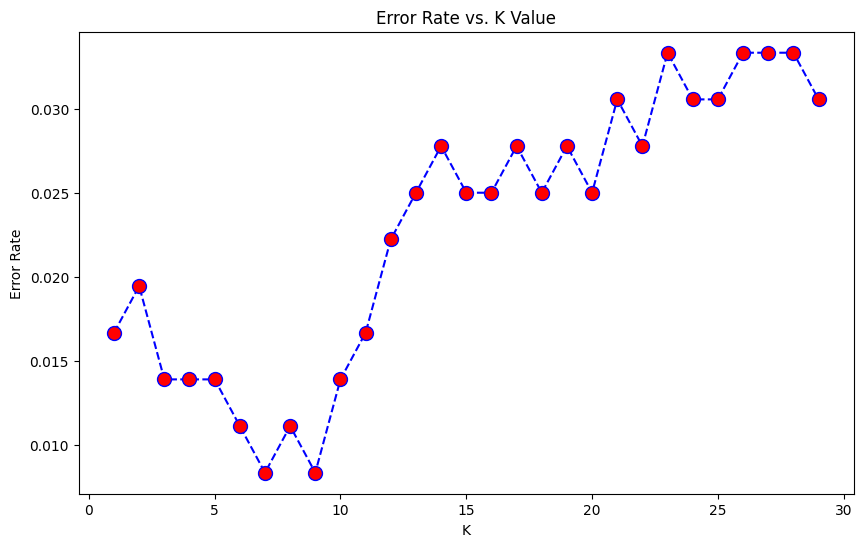

In [89]:
error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [90]:
#while the k-value is 9 the error rate is minimum

In [92]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [93]:
knn.score(x_test,y_test)

0.9916666666666667

**We got max. accuracy when k-value is 9 ie accurracy score is: 0.9916666666666667**

Confusion matrix

In [94]:
y_predi=knn.predict(x_test)

In [95]:
cm=confusion_matrix(y_test,y_predi)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 35]])

Text(50.722222222222214, 0.5, 'truth')

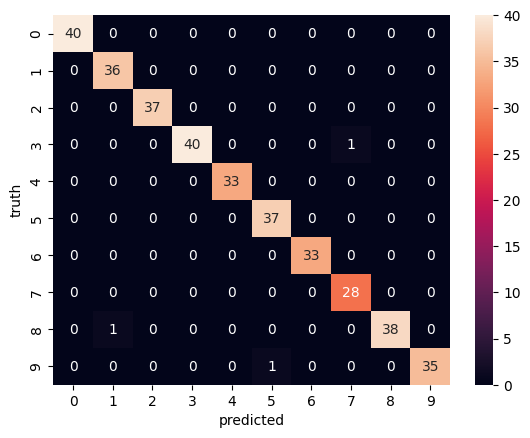

In [96]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')